










## By Safiya banu

## task - 6 :Prediction using Decision Tree Algorithm

## The purpose is if we feed any new data to classifier,it will predict the right class accordingly

### Create Decision Tree Classifier and visualize it graphically

### Import the Required Librariies

In [34]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Load the Dataset

In [6]:
df=pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 6)

Interpretation:There are 150 observation and 6 variables

### Check the data type

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Interpretation:All dependent variables are numerics.Except the Target variable, species is Categorical.

### Remove Insignificant variables

In [11]:
df = df.drop('Id', axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Distribution of variables

#### Distribution of independent  numeric variables

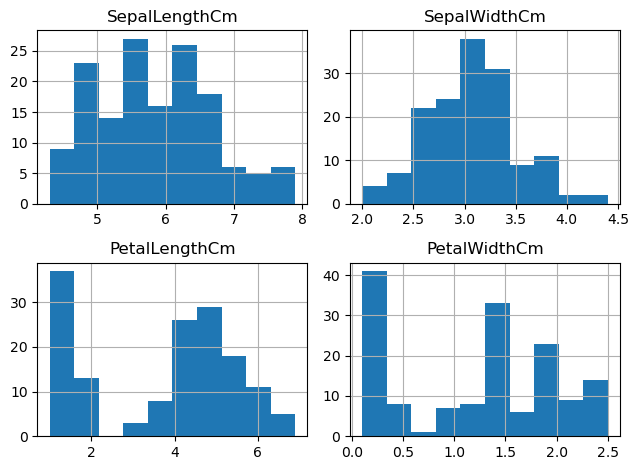

Skewness:


SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [14]:
df.drop('Species', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')

df.drop('Species', axis = 1).skew()

Interpretation:The above plot indicates that all the variables are near normally distributed.

#### Distribution of Dependent categorical variable

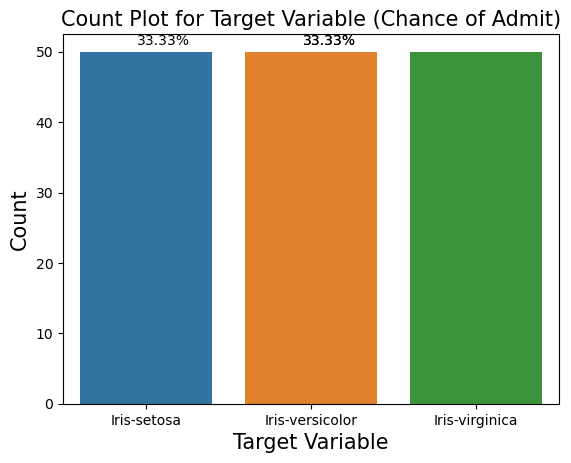

In [19]:
df_target = df['Species'].copy()


df_target.value_counts()


sns.countplot(x = df_target)

plt.text(x = -0.05, y =df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[2] +1, s = str(round((df_target.value_counts()[2])*100/len(df_target),2)) + '%')

plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

C:\Users\safia\AppData\Local\Temp\ipykernel_344\3324592301.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


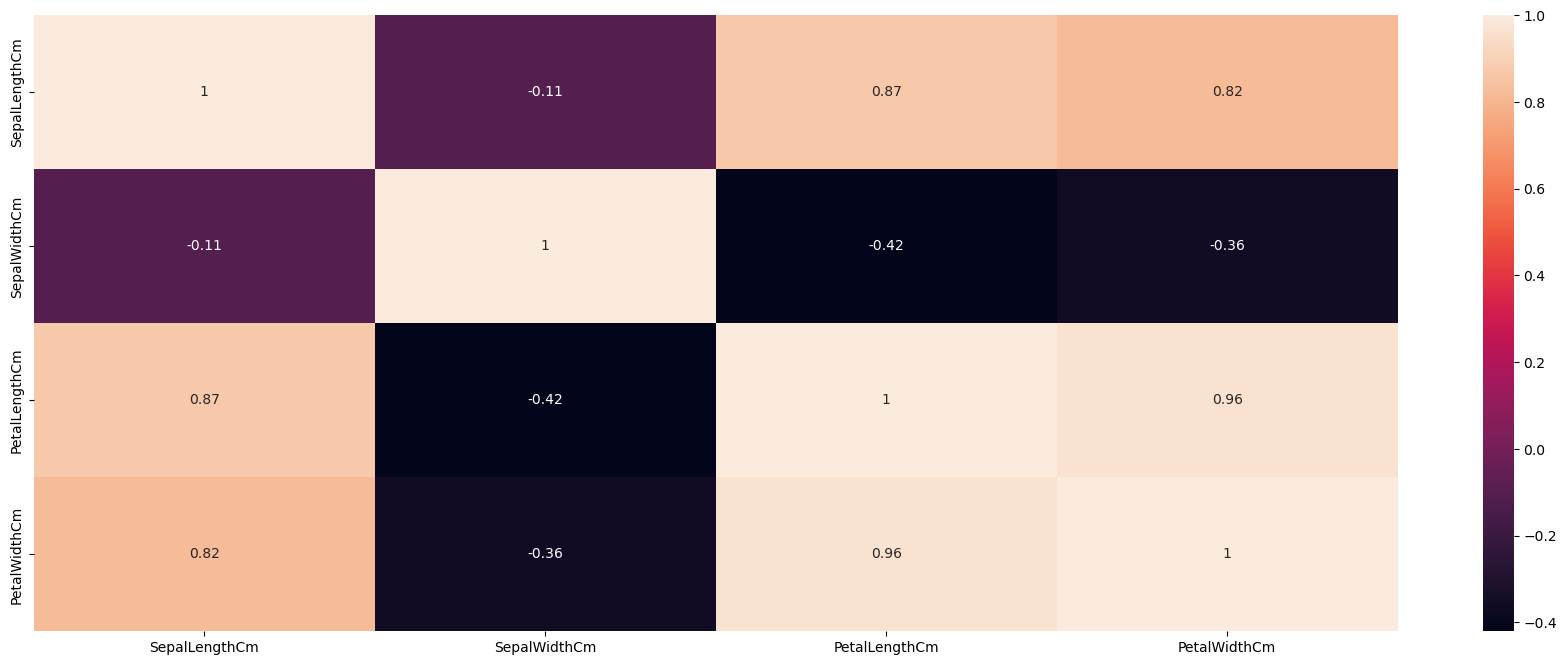

In [23]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Interpretation: There is high positive correlation between petal width and petal length.

##  Missing Value Treatment

In [24]:


Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


## Dummy Encode the Categorical variable

#### Split the dependent and independent variables

In [26]:
# store the target variable 'Species' in a dataframe 'df_target'
df_target = df['Species']

df_feature = df.drop('Species', axis = 1)

In [27]:
#Filter Numeric and categoric variable

In [28]:
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
#Dummy Encode the categorical variable

In [30]:
target = pd.get_dummies(data = df_target, drop_first = True)


In [32]:
X=df_feature.copy()
y=target.copy()

## Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 10, 
                                                    test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (120, 4)
y_train (120, 2)
X_test (30, 4)
y_test (30, 2)


In [36]:
 #create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    train_pred = model.predict(X_train) 

    return(classification_report(y_train, train_pred))

In [37]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

# Decision Tree

In [38]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [50]:
fn=list(X_train.columns)
fn

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

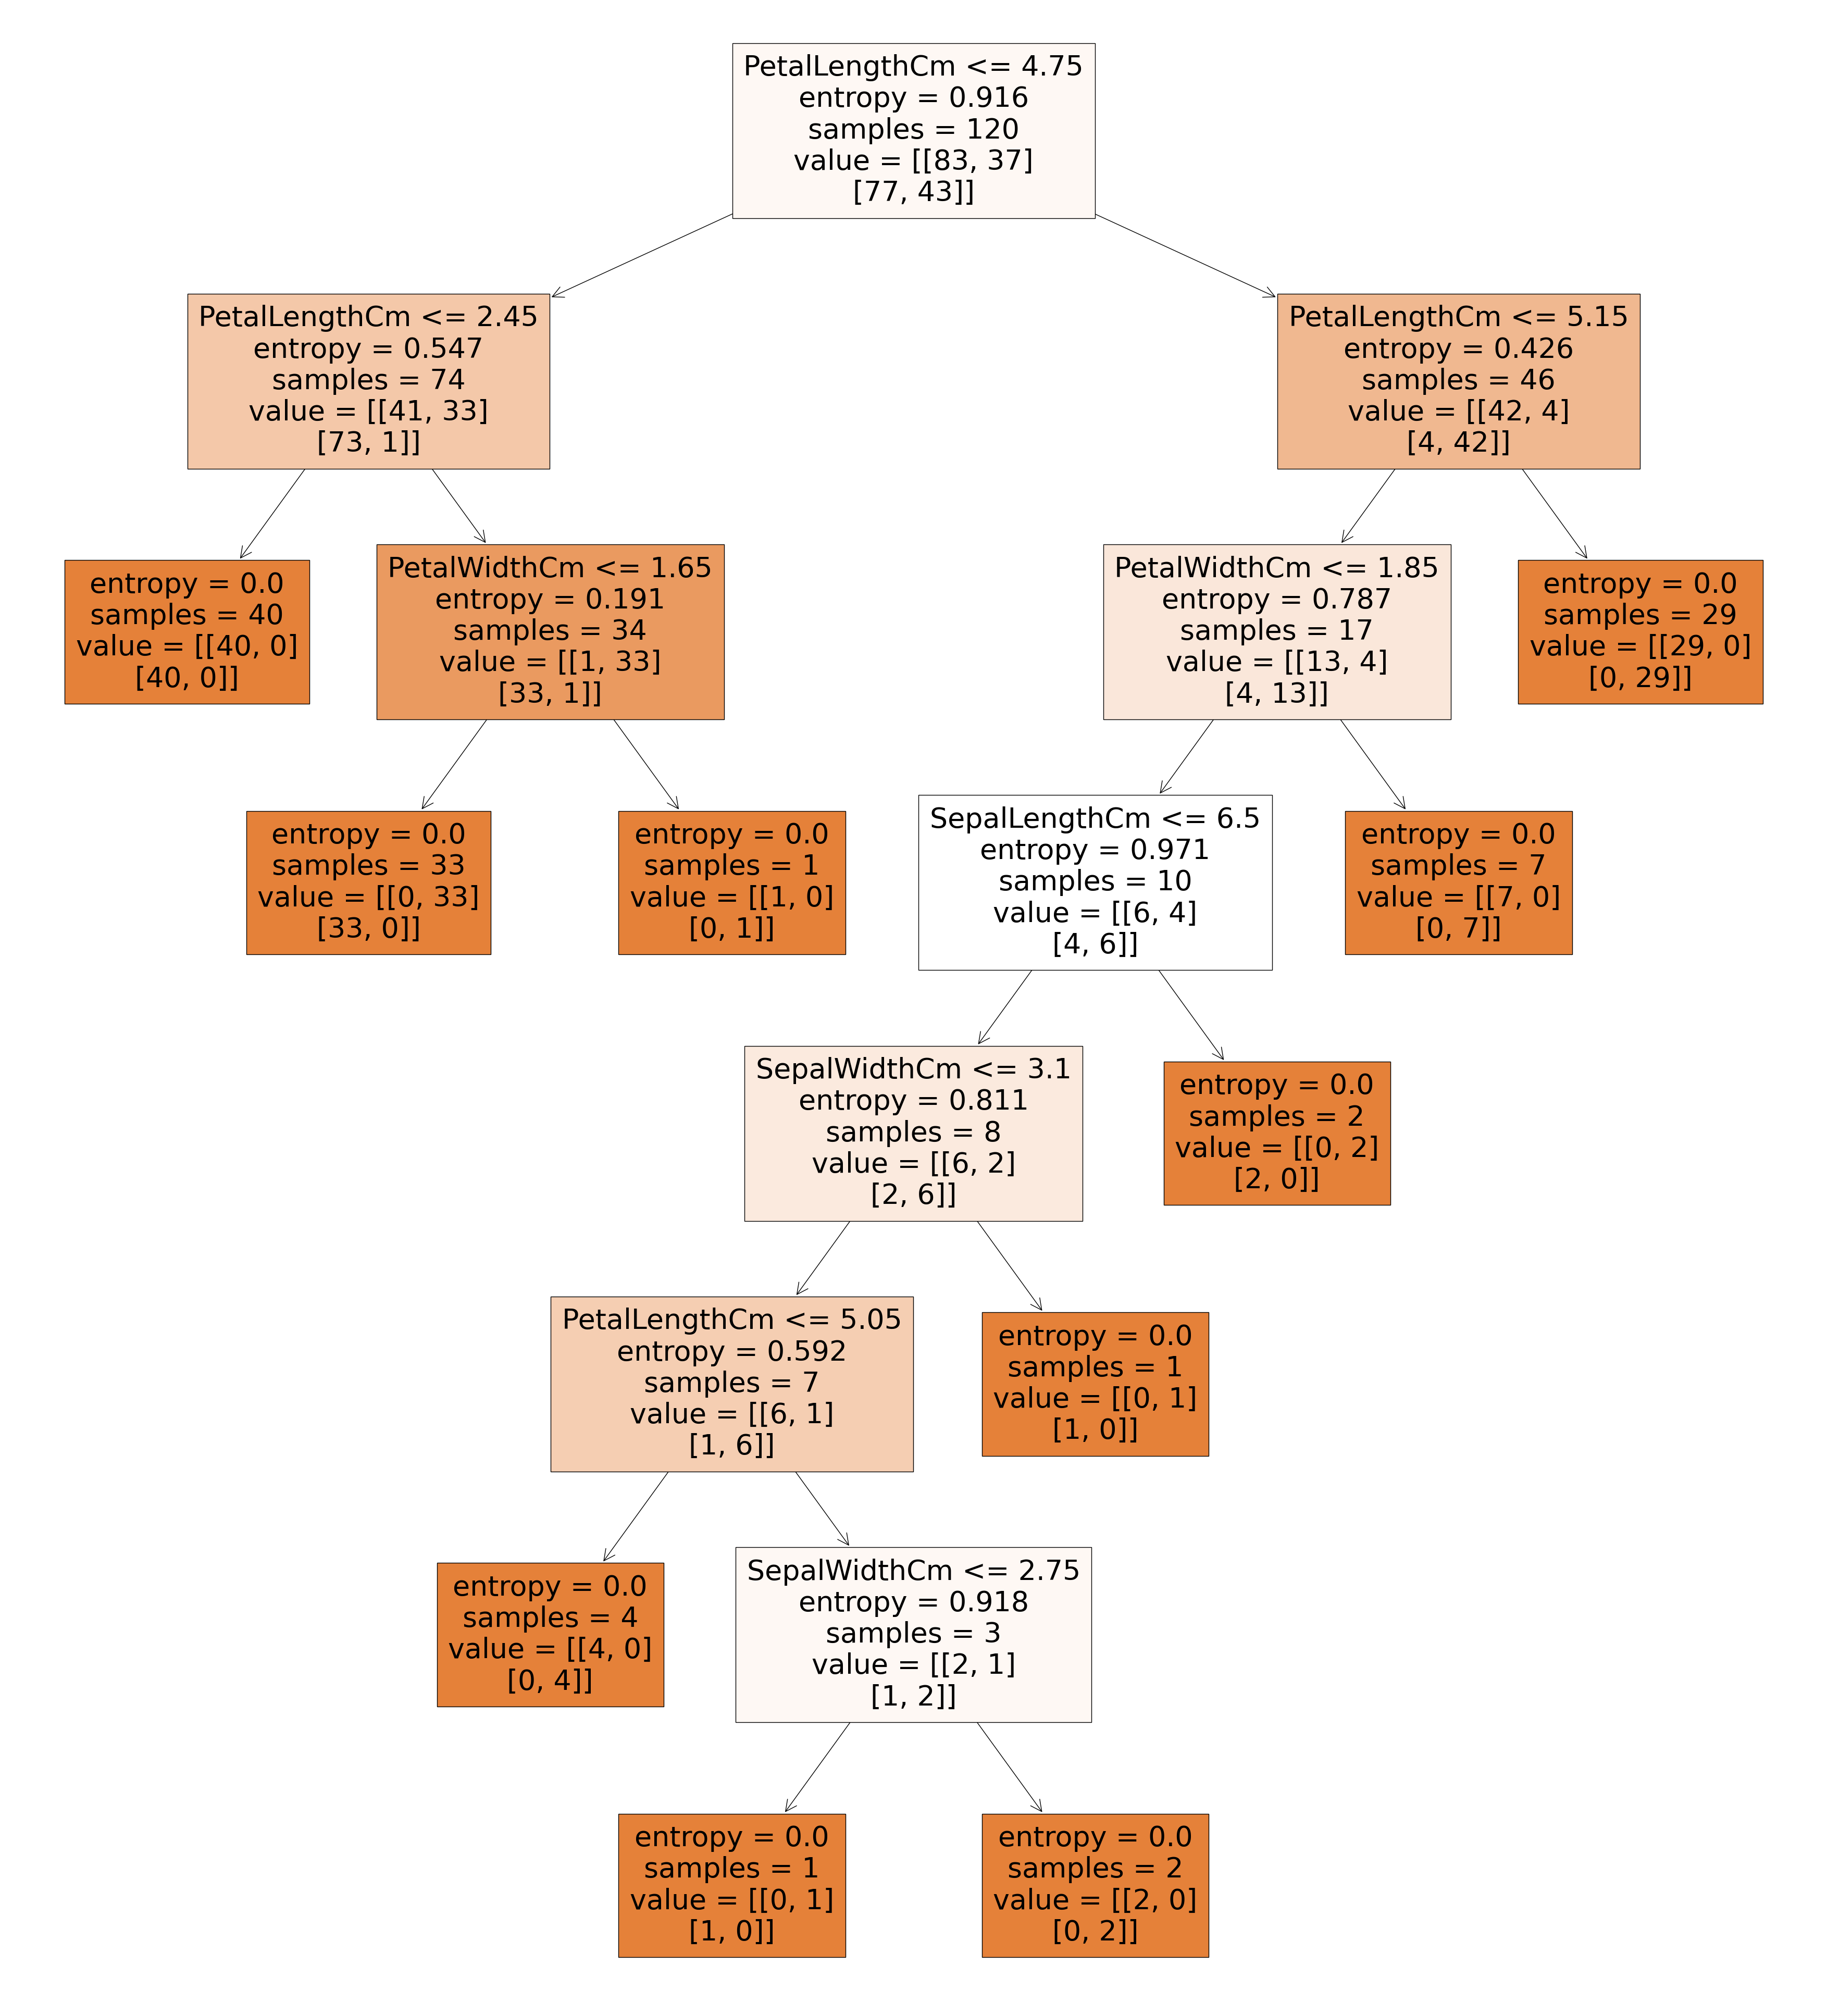

In [51]:
from sklearn import tree

fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(decision_tree,
                   feature_names=fn,  
                   class_names=["0","1","2"],
                   filled=True) 


Interpretation:
    Now we  can feed the data,it will predict  the  right class accordingly

In [48]:
#Calculate performance measures on the train set.

train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43

   micro avg       1.00      1.00      1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80
 samples avg       0.67      0.67      0.67        80



In [49]:
#Calculate performance measures on the test set.

test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      1.00      0.93         7

   micro avg       0.95      0.95      0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20
 samples avg       0.63      0.63      0.63        20

